# Notebook to try to get the USD/UYU exchange data from the World Bank API

## World Bank Explaination on the data

```
Official exchange rate (LCU per US$, period average)

Official exchange rate refers to the exchange rate determined by national authorities or to the rate determined in the legally sanctioned exchange market. It is calculated as an annual average based on monthly averages (local currency units relative to the U.S. dollar).

    Source: International Monetary Fund, International Financial Statistics.
    License:  CC BY-4.0 
    
Development Relevance: In a market-based economy, household, producer, and government choices about resource allocation are influenced by relative prices, including the real exchange rate, real wages, real interest rates, and other prices in the economy. Relative prices also largely reflect these agents' choices. Thus relative prices convey vital information about the interaction of economic agents in an economy and with the rest of the world.
   
Limitations and Exceptions: Official or market exchange rates are often used to convert economic statistics in local currencies to a common currency in order to make comparisons across countries. Since market rates reflect at best the relative prices of tradable goods, the volume of goods and services that a U.S. dollar buys in the United States may not correspond to what a U.S. dollar converted to another country's currency at the official exchange rate would buy in that country, particularly when nontradable goods and services account for a significant share of a country's output. An alternative exchange rate - the purchasing power parity (PPP) conversion factor - is preferred because it reflects differences in price levels for both tradable and nontradable goods and services and therefore provides a more meaningful comparison of real output.

Long Definition: Official exchange rate refers to the exchange rate determined by national authorities or to the rate determined in the legally sanctioned exchange market. It is calculated as an annual average based on monthly averages (local currency units relative to the U.S. dollar).

Periodicity: Annual

Statistical Concept and Methodology: The exchange rate is the price of one currency in terms of another. Official exchange rates and exchange rate arrangements are established by governments. Other exchange rates recognized by governments include market rates, which are determined largely by legal market forces, and for countries with multiple exchange arrangements, principal rates, secondary rates, and tertiary rates.
```

In [1]:
import requests
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../src')

In [2]:
import data.world_bank as wb

In [3]:
def download_exchange_rate(country_code, **kwargs):
    """
    Downloads the Exchange for one country, with respect to USD,
    and returns the data as a pandas DataFrame.

    Args:
        country_code(str): The two letter code for the World Bank webpage
        **kwargs: Arguments for 'download_index', for example:
            start_date(int): The initial year to retreive
            end_date(int): The final year to retreive

    Returns:
        pd.DataFrame: The values for the exchange rates in a dataframe.
    """
    cpi_code = 'PA.NUS.FCRF'
    raw_res = wb.download_index(country_code, cpi_code, **kwargs)
    return wb.format_response(raw_res)

In [4]:
rate = download_exchange_rate('uy', end_date=2017)
print(rate.shape)
rate.head()

(58, 1)


,Uruguay
1960,0.000011
1961,0.000011
1962,0.000011
1963,0.000015
1964,0.000016


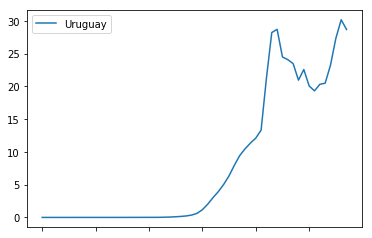

In [5]:
rate.plot()